In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
np.random.seed(100)

/kaggle/input/art-portraits/Portraits_update/Portraits/image_4378.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_5576.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_6267.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_747.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_5775.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_561.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_345.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_3019.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_2566.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_3156.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_3889.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_4722.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_2951.jpg
/kaggle/input/art-portraits/Portraits_update/Portraits/image_1593.jpg
/kaggle/input/art-portr

In [41]:
#Importing Libraries
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import tqdm
import warnings
warnings.filterwarnings("ignore")
#Settings
sns.set(rc={"axes.facecolor":"#EDE9DE","figure.facecolor":"#D8CA7E"})

In [42]:
#Importing data
data_path = "../input/art-portraits/Portraits/"
batch_s =128 
#Import as tf.Dataset
data = tf.keras.preprocessing.image_dataset_from_directory(data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)

Found 4117 files.


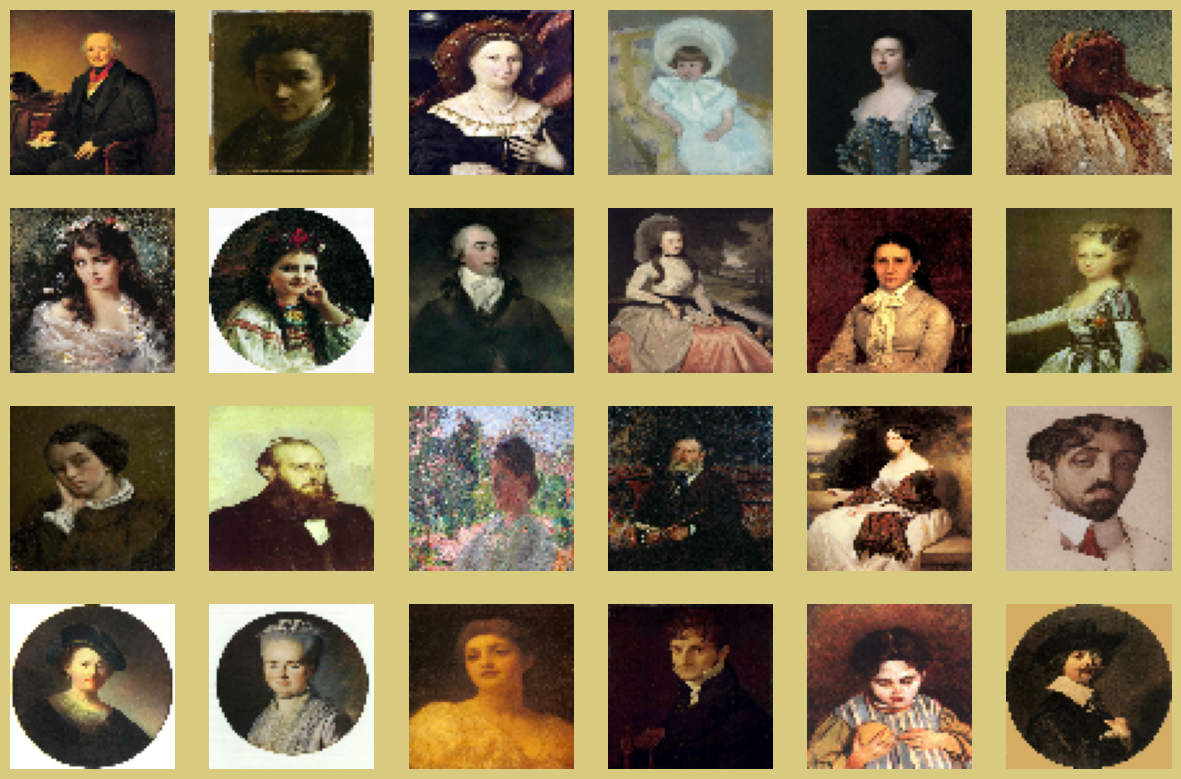

In [43]:
#Defing a function to see images
def Show_Img(data):
    plt.figure(figsize=(15,15))
    for images in data.take(1):
        for i in range(24):
            ax = plt.subplot(6, 6, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")
#Plotting the images in dataset            
Show_Img(data)

In [44]:
# data preprocessing
# increasing dataset
def preprocess_and_augment(image):
    # normalize
    image = tf.cast(image, tf.float32) / 255.0
    # image increasing
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image

# preprocessing
data = data.map(preprocess_and_augment)

In [45]:
print(data)

<_MapDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>


In [46]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

latent_dim = 128  # 设定潜在空间的维度

generator = Sequential([
    # 输入层
    layers.Input(shape=(latent_dim,)),
    
    # 4x4x512
    layers.Dense(4*4*512, use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Reshape((4, 4, 512)),
    
    # 8x8x256
    layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    
    # 16x16x128
    layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    
    # 32x32x64
    layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', use_bias=False),
    layers.BatchNormalization(),
    layers.ReLU(),
    
    # 64x64x3
    layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', use_bias=False),
    layers.Activation('tanh')
])

generator.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 8192)           │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 8, 8, 256)      │     2,097,152 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 16, 16, 128)    │       524,288 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_15 (ReLU)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 32, 32, 64)     │       131,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_16 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 64, 64, 3)      │         3,072 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64, 64, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,838,720 (14.64 MB)

 Trainable params: 3,821,440 (14.58 MB)

 Non-trainable params: 17,280 (67.50 KB)

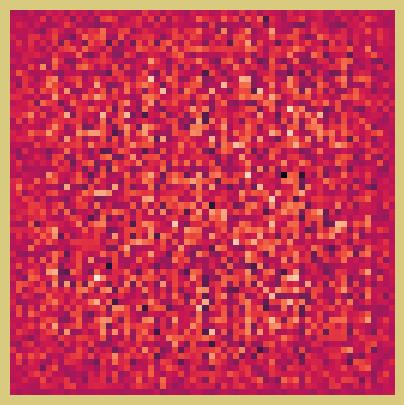

In [47]:
# generate image by random seed 
seed = tf.random.normal([1, latent_dim])
Generated_Portrait = generator(seed, training=False)

# show image generated by generator
plt.figure(figsize=(5, 5))
plt.imshow((Generated_Portrait[0, :, :, 0])) 
plt.axis("off")
plt.show()

In [48]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, Dropout, BatchNormalization, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

#Building a Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d (ZeroPadding2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 17, 17, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 9, 9, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │        41,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,613,889 (6.16 MB)

 Trainable params: 1,611,969 (6.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [49]:
#for the random image generated
Discriminator_Verdict = discriminator(Generated_Portrait)
print (Discriminator_Verdict)


tf.Tensor([[0.50004244]], shape=(1, 1), dtype=float32)


In [50]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        # Decode them to fake images
        generated_images = self.generator(seed)
        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)
        # Assemble labels discriminating real from fake images
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        # Sample random points in the latent space
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}



In [51]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.losses import BinaryCrossentropy

# epoch times
epochs = 200

# optimizer
discriminator_opt = Adamax(learning_rate=1.5e-4, beta_1=0.5)
generator_opt = Adamax(learning_rate=1.5e-4, beta_1=0.5)

#tried new optimizers
# discriminator_opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
# generator_opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

# loss function
loss_fn = tf.keras.losses.BinaryCrossentropy()
# instance model and compile it
model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
model.compile(d_optimizer=discriminator_opt, g_optimizer=generator_opt, loss_fn=loss_fn)

# train GAN model
history = model.fit(data, epochs=epochs)

Epoch 1/200
 3/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - d_loss: 0.6744 - g_loss: 0.6933

W0000 00:00:1718716505.856695     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 538ms/step - d_loss: 0.5571 - g_loss: 0.7552
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - d_loss: 0.4964 - g_loss: 1.4615
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 419ms/step - d_loss: 0.3674 - g_loss: 1.4941
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 436ms/step - d_loss: 0.5247 - g_loss: 1.4199
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - d_loss: 0.6505 - g_loss: 1.1428
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 443ms/step - d_loss: 0.5605 - g_loss: 1.2550
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - d_loss: 0.5043 - g_loss: 1.1454
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 432ms/step - d_loss: 0.3992 - g_loss: 1.4315
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 430ms/step - d_loss: 0.6041 - g_loss: 1.4374
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 444ms/step - d_loss: 0.4422 - g_loss: 1.6179
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 442ms/step - d_loss: 0.3620 - g_loss: 1.2456
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 15

Text(0.5, 1.0, 'Learning Curve')

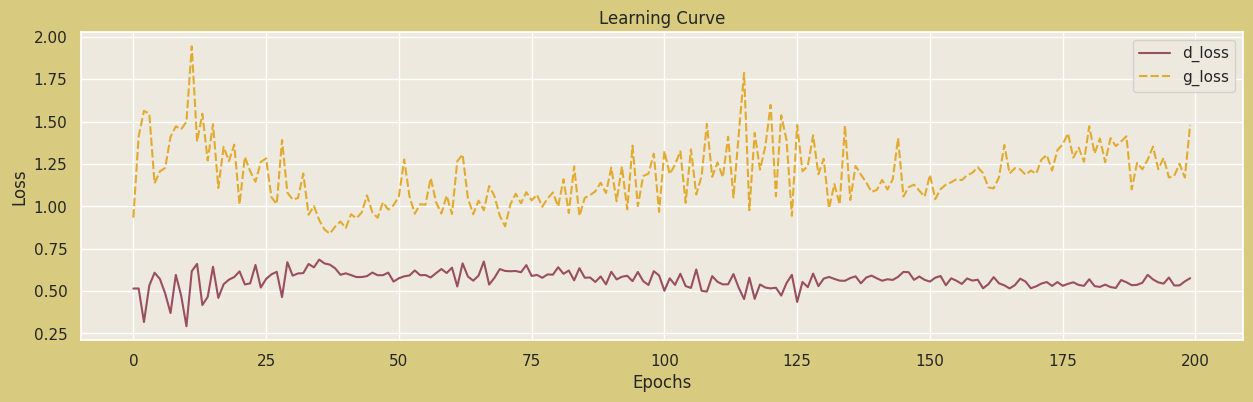

In [52]:
pal=["#994F5F","#E2AB30"]
#Plotting the learning curve
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4))
ax=sns.lineplot(data=history_df, palette= pal)
ax.set(xlabel ="Epochs")
ax.set(ylabel ="Loss")
ax.set_title("Learning Curve")


In [53]:
#Number of images to be generate
num_img=24

#A function to generate and save images
def Potrait_Generator():
    Generated_Paintings = []
    seed = tf.random.normal([num_img, latent_dim])
    generated_image = generator(seed)
    generated_image *= 255 
    generated_image = generated_image.numpy()
    for i in range(num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_image[i])
            Generated_Paintings.append(img)
            img.save("Potraits{:02d}.png".format(i)) 
    return 

#Generating images
Images = Potrait_Generator()

Found 24 files.


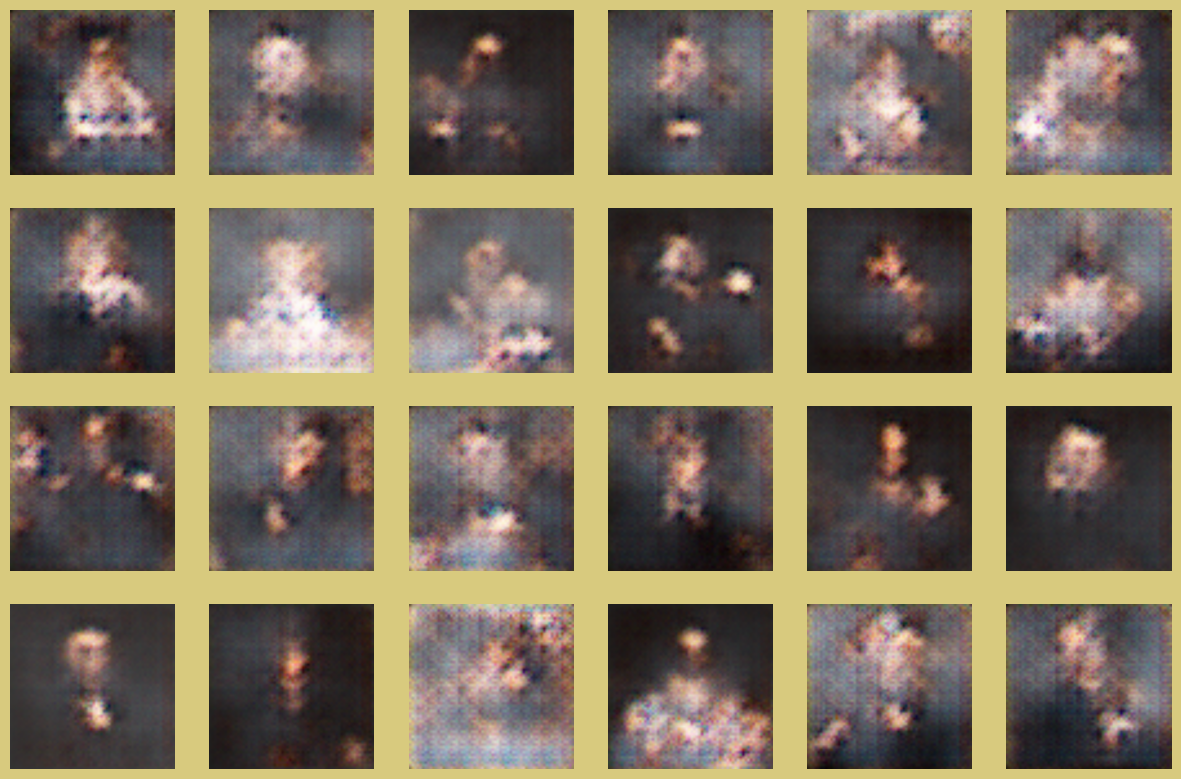

In [54]:
#Loading generated images
Generated_path = "./"
Potraits_generated = tf.keras.preprocessing.image_dataset_from_directory(Generated_path, label_mode = None)
#Plotting generated images
Show_Img(Potraits_generated)